In [1]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import suport.patchesMethods as pm

In [3]:
linesP

array([[[169, 169, 169],
        [167, 167, 167],
        [165, 165, 165],
        ...,
        [173, 173, 173],
        [174, 174, 174],
        [175, 175, 175]],

       [[169, 169, 169],
        [167, 167, 167],
        [165, 165, 165],
        ...,
        [171, 171, 171],
        [172, 172, 172],
        [174, 174, 174]],

       [[168, 168, 168],
        [166, 166, 166],
        [165, 165, 165],
        ...,
        [168, 168, 168],
        [170, 170, 170],
        [172, 172, 172]],

       ...,

       [[192, 192, 192],
        [186, 186, 186],
        [179, 179, 179],
        ...,
        [165, 165, 165],
        [170, 170, 170],
        [174, 174, 174]],

       [[191, 191, 191],
        [184, 184, 184],
        [176, 176, 176],
        ...,
        [155, 155, 155],
        [157, 157, 157],
        [159, 159, 159]],

       [[190, 190, 190],
        [182, 182, 182],
        [173, 173, 173],
        ...,
        [150, 150, 150],
        [147, 147, 147],
        [146, 146, 146]]

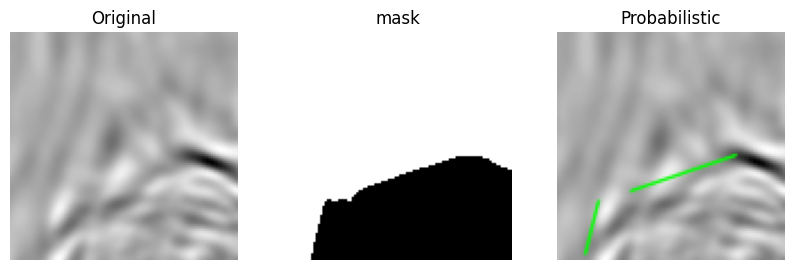

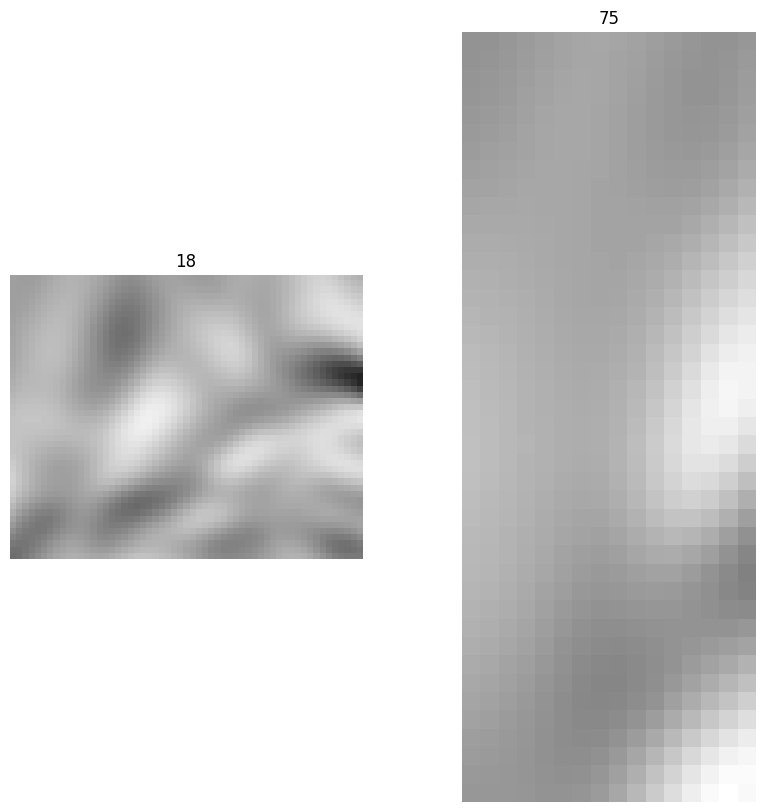

In [2]:
#sample_path="tgs_salt/1bd1c8c771.png"
sample_path="tgs_salt/0bdd44d530.png"
mask_path  ="tgs_salt/0bdd44d530Mask.png"
original = cv2.imread(sample_path)
mask     = cv2.imread(mask_path,0)
#sample_path="tgs_salt/0a1742c740.png"
patches, linesInImage = pm.probHough(mask, original, tresh = 20, minPoints=15, maxGap=5)
pm.show3Images(original,mask, linesInImage)
pm.dispArrayImages(patches)

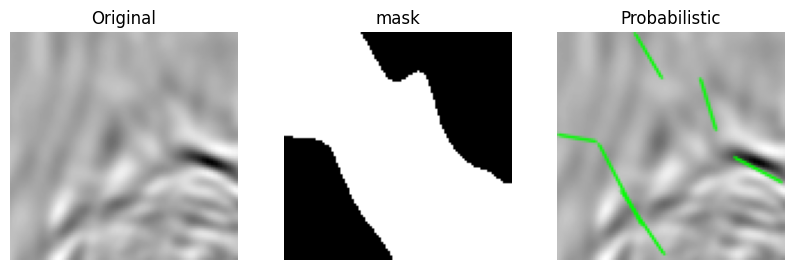

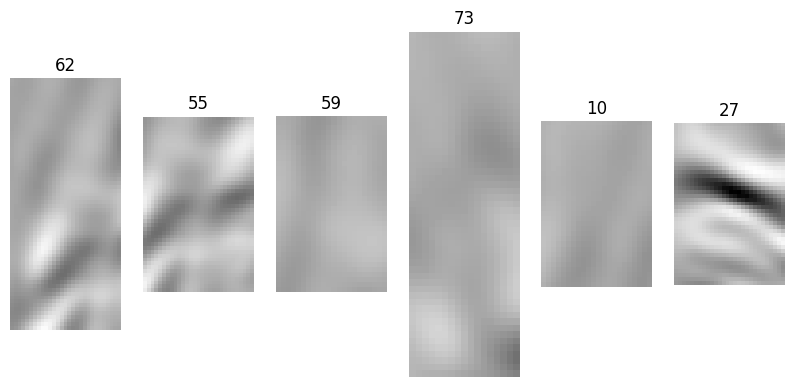

In [5]:
sample_path="tgs_salt/0bdd44d530.png"
mask_path  ="tgs_salt/0a1742c740Mask.png"

original = cv2.imread(sample_path)
mask = cv2.imread(mask_path,0)
patches, linesImage = pm.probHough(mask, original, tresh = 20, minPoints=10, maxGap=10)
pm.show3Images(original, mask,  linesImage )
pm.dispArrayImages(patches)

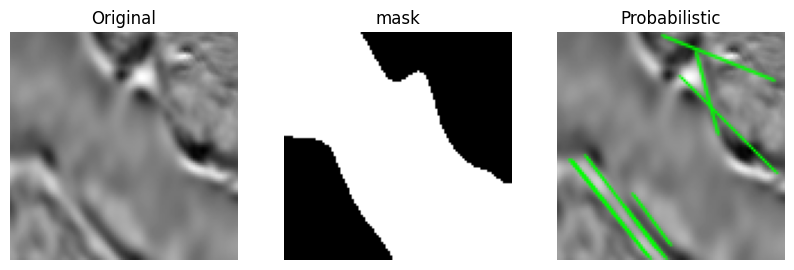

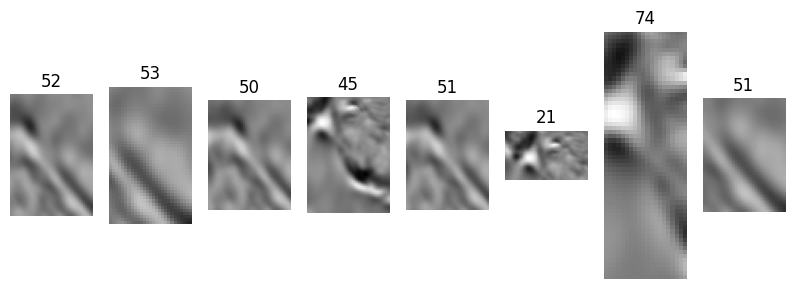

In [6]:
sample_path="tgs_salt/0a1742c740.png"
mask_path  ="tgs_salt/0a1742c740Mask.png"

original = cv2.imread(sample_path)
patches, linesP = pm.probHough(original, original, tresh = 20, minPoints=20, maxGap=10)
pm.show3Images(original,mask,linesP )
pm.dispArrayImages(patches)



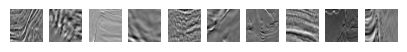

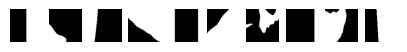

In [18]:
#Desktop I3
TRAIN_CSV = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train1090.csv'
masksPath = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\masks10-90'
imagesPath = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train\images'

""" # ES00004605
TRAIN_CSV = r'G:\_phd\dataset\tgs-salt\saltMaskOk.csv'
masksPath = r'G:\_phd\dataset\tgs-salt\train\masks'
imagesPath= r'G:\_phd\dataset\tgs-salt\train\images' """



df_train = pd.read_csv(TRAIN_CSV)
imageFilesList = df_train.iloc[0:10,0]
  
imagesList = pm.loadImages(imagesPath, imageFilesList)
masksList  = pm.loadImages(masksPath,  imageFilesList)
pm.showImages(imagesList)
pm.showImages(masksList)

In [8]:
patchesDB = pm.buildPatchesDB(masksList, imagesList)

309


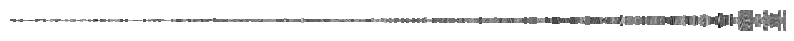

In [15]:
print(len(patchesDB))
    
pm.dispArrayImages(patchesDB)

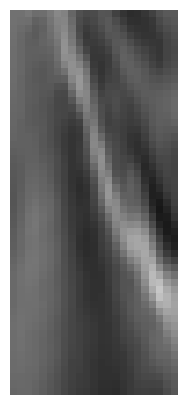

In [17]:
img = pm.searchNearestKey(patchesDB, 70)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

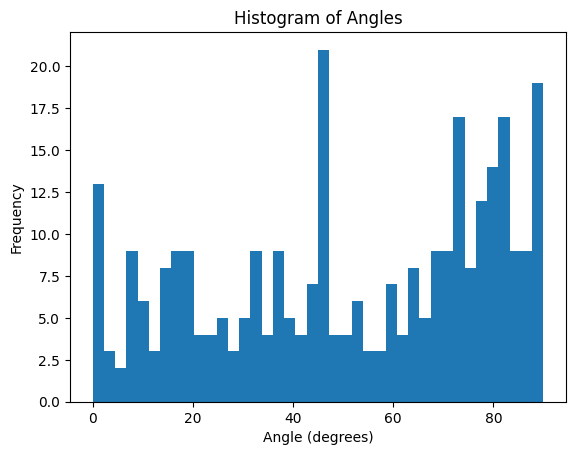

In [16]:
# make histogram of angles
angles = []
for i in range(len(patchesDB)):
    angles.append(patchesDB[i][0])
hist, bins = np.histogram(angles, bins=20)
# Plot the histogram
plt.hist(angles, bins=40)
plt.title("Histogram of Angles")
plt.xlabel("Angle (degrees)")
plt.ylabel("Frequency")
plt.show